<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/tesla_price_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check Tesla stock performance

In [0]:
# Import libraries
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as web

In [110]:
# Choose dates
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,10,20)

# Choose stock and data source
df = web.DataReader('TSLA', 'yahoo', start, end)

# Choose style
style.use('ggplot')

#Check
print('Shape', df.shape)
print(df.tail(5))

Shape (2344, 6)
                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2019-10-14  258.549988  247.130005  ...  10205000  256.959991
2019-10-15  260.000000  254.119995  ...   6432800  257.890015
2019-10-16  262.100006  256.920013  ...   6684100  259.750000
2019-10-17  264.779999  260.170013  ...   4769300  261.970001
2019-10-18  262.799988  255.100006  ...   5749800  256.950012

[5 rows x 6 columns]


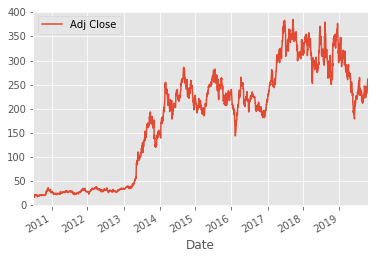

In [109]:
#Plot raw performance
df[['Adj Close']].plot()
plt.show()

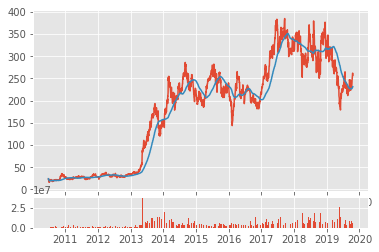

In [115]:
# Add moving average 
df['100_mov_avg'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

# Create subplots
ax1 = plt.subplot2grid((6,1),  (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),  (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100_mov_avg'])
ax2.bar(df.index, df['Volume'])

plt.show()